In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Historical Spending Analysis

#### Concat transaction_fact and wrld_transaction_fact

In [2]:
df_local = pd.read_csv('transaction_fact_20250325.csv')
df_world = pd.read_csv('wrld_stor_tran_fact_20250325.csv')

# Add a source column to distinguish data origin
df_local['source'] = 'local'
df_world['source'] = 'world'

# Ensure both datasets have the same columns
assert set(df_local.columns) == set(df_world.columns), "Columns are not the same!"

# Concatenate both datasets vertically
df_all_transactions = pd.concat([df_local, df_world], ignore_index=True)
df_all_transactions

,current_account_nbr,transaction_type,transaction_code,transaction_date,transaction_amt,payment_type,transaction_return_cnt,transaction_sale_cnt,product_amt,product_qty,...,adj_orgn_tran_dt,curr_markup_fee,fcr_amount,fcr_flag,fcr_rate_of_exchange,frgn_curr_code,frgn_tran_amt,us_equiv_amt,posting_date,source
0,X7jfKh6xrPAB8Tx6,SALE,253,2024-06-05,15.78,NaN,0,1,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,840,15.78,0.0,2024-06-06,local
1,yntD77AZDylS48Q4,SALE,253,2024-06-19,14.85,NaN,0,1,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,840,14.85,0.0,2024-06-20,local
2,LIJPI0sK28Pa7fX2,SALE,253,2024-06-26,136.16,NaN,0,1,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,840,136.16,0.0,2024-06-27,local
3,CMAr5Apxwdzpvoze,SALE,253,2024-08-15,8.74,NaN,0,1,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,840,8.74,0.0,2024-08-16,local
4,eJSfTCGPvJulGzd3,SALE,253,2024-08-17,26.65,NaN,0,1,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,840,26.65,0.0,2024-08-18,local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547185,uqlll7MEoZkj3vur,SALE,253,2024-11-12,9.57,NaN,0,1,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,840,9.57,0.0,2024-11-13,world
1547186,ZGjYc8aETjtytUYR,SALE,253,2025-03-10,16.11,NaN,0,1,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,840,16.11,0.0,2025-03-11,world
1547187,4JpGONAzyfmoxi7A,SALE,253,2025-03-20,20.37,NaN,0,1,NaN,NaN,...,2025-02-26,0.0,NaN,NaN,NaN,840,20.37,0.0,2025-03-21,world
1547188,tUUUlJJZ2ETedT7g,SALE,253,2024-11-21,180.00,NaN,0,1,NaN,NaN,...,2024-11-12,0.0,NaN,NaN,NaN,840,180.00,0.0,2024-11-22,world


##### Data wrangling

In [3]:
df_all_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547190 entries, 0 to 1547189
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   current_account_nbr     1547190 non-null  object 
 1   transaction_type        1547190 non-null  object 
 2   transaction_code        1547190 non-null  int64  
 3   transaction_date        1547190 non-null  object 
 4   transaction_amt         1547190 non-null  float64
 5   payment_type            0 non-null        float64
 6   transaction_return_cnt  1547190 non-null  int64  
 7   transaction_sale_cnt    1547190 non-null  int64  
 8   product_amt             0 non-null        float64
 9   product_qty             0 non-null        float64
 10  invoice_nbr             485136 non-null   float64
 11  first_purchase_ind      1547190 non-null  object 
 12  adj_orgn_tran_dt        72285 non-null    object 
 13  curr_markup_fee         1547093 non-null  float64
 14  fc

In [4]:
# Drop columns that are completely null
df_all_transactions = df_all_transactions.dropna(axis=1, how='all')
df_all_transactions = df_all_transactions.drop_duplicates()
df_all_transactions

,current_account_nbr,transaction_type,transaction_code,transaction_date,transaction_amt,transaction_return_cnt,transaction_sale_cnt,invoice_nbr,first_purchase_ind,adj_orgn_tran_dt,curr_markup_fee,frgn_curr_code,frgn_tran_amt,us_equiv_amt,posting_date,source
0,X7jfKh6xrPAB8Tx6,SALE,253,2024-06-05,15.78,0,1,NaN,N,NaN,0.0,840,15.78,0.0,2024-06-06,local
1,yntD77AZDylS48Q4,SALE,253,2024-06-19,14.85,0,1,96971.0,N,NaN,0.0,840,14.85,0.0,2024-06-20,local
2,LIJPI0sK28Pa7fX2,SALE,253,2024-06-26,136.16,0,1,2786.0,N,NaN,0.0,840,136.16,0.0,2024-06-27,local
3,CMAr5Apxwdzpvoze,SALE,253,2024-08-15,8.74,0,1,78988.0,N,NaN,0.0,840,8.74,0.0,2024-08-16,local
4,eJSfTCGPvJulGzd3,SALE,253,2024-08-17,26.65,0,1,87227.0,N,NaN,0.0,840,26.65,0.0,2024-08-18,local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547184,RHjoQGhTFr6YvM5Z,SALE,253,2025-03-03,99.00,0,1,NaN,N,NaN,0.0,840,99.00,0.0,2025-03-04,world
1547185,uqlll7MEoZkj3vur,SALE,253,2024-11-12,9.57,0,1,NaN,N,NaN,0.0,840,9.57,0.0,2024-11-13,world
1547186,ZGjYc8aETjtytUYR,SALE,253,2025-03-10,16.11,0,1,NaN,N,NaN,0.0,840,16.11,0.0,2025-03-11,world
1547187,4JpGONAzyfmoxi7A,SALE,253,2025-03-20,20.37,0,1,69297.0,N,2025-02-26,0.0,840,20.37,0.0,2025-03-21,world


In [5]:
dedup_cols = ['current_account_nbr', 'transaction_type', 'transaction_code', 'transaction_date', 'transaction_amt', 'transaction_return_cnt', 'transaction_sale_cnt', 'invoice_nbr']

# Keep the first occurrence when dropping duplicates (default: keep='first')
df_all_transactions = df_all_transactions.drop_duplicates(subset=dedup_cols)
df_all_transactions

,current_account_nbr,transaction_type,transaction_code,transaction_date,transaction_amt,transaction_return_cnt,transaction_sale_cnt,invoice_nbr,first_purchase_ind,adj_orgn_tran_dt,curr_markup_fee,frgn_curr_code,frgn_tran_amt,us_equiv_amt,posting_date,source
0,X7jfKh6xrPAB8Tx6,SALE,253,2024-06-05,15.78,0,1,NaN,N,NaN,0.0,840,15.78,0.0,2024-06-06,local
1,yntD77AZDylS48Q4,SALE,253,2024-06-19,14.85,0,1,96971.0,N,NaN,0.0,840,14.85,0.0,2024-06-20,local
2,LIJPI0sK28Pa7fX2,SALE,253,2024-06-26,136.16,0,1,2786.0,N,NaN,0.0,840,136.16,0.0,2024-06-27,local
3,CMAr5Apxwdzpvoze,SALE,253,2024-08-15,8.74,0,1,78988.0,N,NaN,0.0,840,8.74,0.0,2024-08-16,local
4,eJSfTCGPvJulGzd3,SALE,253,2024-08-17,26.65,0,1,87227.0,N,NaN,0.0,840,26.65,0.0,2024-08-18,local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547184,RHjoQGhTFr6YvM5Z,SALE,253,2025-03-03,99.00,0,1,NaN,N,NaN,0.0,840,99.00,0.0,2025-03-04,world
1547185,uqlll7MEoZkj3vur,SALE,253,2024-11-12,9.57,0,1,NaN,N,NaN,0.0,840,9.57,0.0,2024-11-13,world
1547186,ZGjYc8aETjtytUYR,SALE,253,2025-03-10,16.11,0,1,NaN,N,NaN,0.0,840,16.11,0.0,2025-03-11,world
1547187,4JpGONAzyfmoxi7A,SALE,253,2025-03-20,20.37,0,1,69297.0,N,2025-02-26,0.0,840,20.37,0.0,2025-03-21,world


In [6]:
# Identify duplicate rows where all three columns are the same
duplicate_rows = df_all_transactions[df_all_transactions.duplicated(
    subset=['invoice_nbr', 'transaction_code', 'current_account_nbr','transaction_date','transaction_amt'], keep=False
)]

# Check how many such rows exist
print("Duplicate rows:", len(duplicate_rows))
duplicate_rows.sort_values(by='current_account_nbr').head()

Duplicate rows: 0


,current_account_nbr,transaction_type,transaction_code,transaction_date,transaction_amt,transaction_return_cnt,transaction_sale_cnt,invoice_nbr,first_purchase_ind,adj_orgn_tran_dt,curr_markup_fee,frgn_curr_code,frgn_tran_amt,us_equiv_amt,posting_date,source


In [7]:
df_transactions = df_all_transactions[['current_account_nbr', 'transaction_type', 'transaction_code', 'transaction_amt', 'transaction_date', 'transaction_return_cnt', 'transaction_sale_cnt', 'invoice_nbr','first_purchase_ind', 'frgn_curr_code', 'source']]

In [8]:
df_transactions['transaction_code'].unique()

array([253, 271, 255, 259, 251, 254, 283, 272, 252, 282, 400, 280, 370,
       256, 288, 258, 286, 285, 701, 257], dtype=int64)

In [9]:
# Select the transaction codes related to spending/purchases
selected_codes = [253, 254, 255, 256, 257, 258, 288]   
consumption_df = df_transactions[df_transactions['transaction_code'].isin(selected_codes)]

# Convert the amounts of negative transactions into negative values
consumption_df.loc[consumption_df['transaction_code'] == 255, 'transaction_amt'] *= -1
consumption_df

,current_account_nbr,transaction_type,transaction_code,transaction_amt,transaction_date,transaction_return_cnt,transaction_sale_cnt,invoice_nbr,first_purchase_ind,frgn_curr_code,source
0,X7jfKh6xrPAB8Tx6,SALE,253,15.78,2024-06-05,0,1,NaN,N,840,local
1,yntD77AZDylS48Q4,SALE,253,14.85,2024-06-19,0,1,96971.0,N,840,local
2,LIJPI0sK28Pa7fX2,SALE,253,136.16,2024-06-26,0,1,2786.0,N,840,local
3,CMAr5Apxwdzpvoze,SALE,253,8.74,2024-08-15,0,1,78988.0,N,840,local
4,eJSfTCGPvJulGzd3,SALE,253,26.65,2024-08-17,0,1,87227.0,N,840,local
...,...,...,...,...,...,...,...,...,...,...,...
1547184,RHjoQGhTFr6YvM5Z,SALE,253,99.00,2025-03-03,0,1,NaN,N,840,world
1547185,uqlll7MEoZkj3vur,SALE,253,9.57,2024-11-12,0,1,NaN,N,840,world
1547186,ZGjYc8aETjtytUYR,SALE,253,16.11,2025-03-10,0,1,NaN,N,840,world
1547187,4JpGONAzyfmoxi7A,SALE,253,20.37,2025-03-20,0,1,69297.0,N,840,world


###### For double-checking

In [10]:
# Find account IDs with negative transaction amounts
accounts_with_negative_amt = consumption_df[consumption_df['transaction_amt'] < 0]['current_account_nbr'].unique()

# Pick one of those accounts (e.g., the fourth one)
sample_account = accounts_with_negative_amt[3]
print(f"Selected account: {sample_account}")

# Retrieve the full transaction history for the selected account
sample_df = consumption_df[consumption_df['current_account_nbr'] == sample_account]

# Sort by transaction date for easier inspection
sample_df = sample_df.sort_values(by='transaction_date')

Selected account: gnOagnTGIDYGMNGM


In [11]:
# consumption_df.to_csv("consumption_df.csv", index=False)

#### Left Join syf_id on account_dim

In [12]:
account_df = pd.read_csv('account_dim_20250325.csv')
syf_id_df = pd.read_csv('syf_id_20250325.csv')

# Left join syf_id on account_dim using account number mapping
syf_id_df = syf_id_df.rename(columns={
    'open_date': 'id_open_date',
    'closed_date': 'id_closed_date'
})

cust_account = account_df.merge(
    syf_id_df,
    how='left',
    left_on='current_account_nbr',
    right_on='account_nbr_pty'
)

cust_account

,current_account_nbr,client_id,open_date,card_activation_date,card_activation_flag,ebill_ind,date_in_collection,overlimit_type_flag,payment_hist_1_12_mths,payment_hist_13_24_mths,...,external_status_reason_code,special_finance_charge_ind,pscc_ind,ext_status_reason_cd_desc,account_card_type,ds_id,account_nbr_pty,confidence_level,id_open_date,id_closed_date
0,nTgalbpd5Rsol7CA,YCTHAA278DC,2020-07-17T00:00:00.000-04:00,NaN,8,E,NaN,0,ZZZZZZIAZZZZ,ZZZZIIIQIIII,...,0,NaN,0,NaN,DUAL CARD,2jDOvGoRc0bUMr8523Ki7HG8r014kyox,nTgalbpd5Rsol7CA,HIGH,2020-07-17,NaN
1,xYaLrD9IvmbVl1PB,CCSP489PLCC,2024-07-24T00:00:00.000-04:00,2024-08-09T00:00:00.000-04:00,0,E,NaN,0,IQIIIQIA,"\\\\\\""""",...,0,NaN,1,NaN,DUAL CARD,ask2zRVq6SVo1S2L7ysgyJbKlh7omJv4,xYaLrD9IvmbVl1PB,HIGH,2024-07-24,NaN
2,JM78WNziiRWgmL8e,HGBHARRFT984,2024-05-05T00:00:00.000-04:00,2024-05-05T00:00:00.000-04:00,0,"\\\\\\""""",NaN,0,IIIQIQIIIIA,"\\\\\\""""",...,0,NaN,0,NaN,PLCC,vYl8O3ZA1ZUh87WSvxSOr7IVVqbCh2s2,JM78WNziiRWgmL8e,HIGH,2024-05-05,NaN
3,bv4NLVhWTGCf8KgC,OSELW263,2024-07-28T00:00:00.000-04:00,2024-09-08T00:00:00.000-04:00,0,"\\\\\\""""",NaN,0,I1III1A,"\\\\\\""""",...,0,NaN,0,NaN,PLCC,z28iDKnEHHaoAn4HQRUo0IyPEKqr63bf,bv4NLVhWTGCf8KgC,HIGH,2024-07-28,NaN
4,nrXceQabYIHo31lp,HGBHARRFT984,2024-09-15T00:00:00.000-04:00,2024-09-15T00:00:00.000-04:00,0,"\\\\\\""""",NaN,0,"\\\\\\""""","\\\\\\""""",...,0,NaN,0,NaN,PLCC,oqygCyVw7ycuXi4KV3Yqy7jzVhpRJzn0,nrXceQabYIHo31lp,HIGH,2024-09-15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18065,K8ixzIELRNtw1drn,YAUAPPLLDA934,2023-11-27T00:00:00.000-05:00,NaN,7,E,NaN,0,ZZZZZQQQQQQQ,QQ#A,...,35,NaN,0,A35 Temporary Freeze - Customer may have lost ...,DUAL CARD,yKTQRqoihngAieLLfxK3ah4VxNzM0Gmr,K8ixzIELRNtw1drn,HIGH,2023-11-27,NaN
18066,CRIi94oT7Dddh2zu,TJX513PLCC,2023-09-11T00:00:00.000-04:00,2023-09-11T00:00:00.000-04:00,0,"\\\\\\""""",NaN,0,ZZZZZZZZZZZZ,ZZZZIA,...,35,NaN,0,A35 Temporary Freeze - Customer may have lost ...,PLCC,llFve8i6QQqpDgnFcl4EOd4cetVbcCVN,CRIi94oT7Dddh2zu,HIGH,2023-09-11,NaN
18067,XiW0as5dJX6GJRi0,CCSP489PLCC,2023-12-03T00:00:00.000-05:00,NaN,7,E,NaN,0,ZZZIIIIIIIII,IIIA,...,35,NaN,1,A35 Temporary Freeze - Customer may have lost ...,DUAL CARD,ES8IrFSCR6O9xCHeLV0899OzjLlG3wSq,XiW0as5dJX6GJRi0,HIGH,2023-12-03,NaN
18068,Xu1i4wqn776tFKU6,CMSSSNAO606,2023-07-27T00:00:00.000-04:00,2025-01-20T00:00:00.000-05:00,0,E,NaN,0,Z0ZZZZIIAIQQ,QQQIQIA,...,46,NaN,0,A46 Universal Fraud Team Potential Fraud,PLCC,sl7zgUoFi0DUMpU4EPhlubURg0bldQw9,Xu1i4wqn776tFKU6,HIGH,2023-07-27,NaN


In [13]:
cust_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18070 entries, 0 to 18069
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   current_account_nbr          18070 non-null  object 
 1   client_id                    18070 non-null  object 
 2   open_date                    18070 non-null  object 
 3   card_activation_date         15223 non-null  object 
 4   card_activation_flag         18070 non-null  object 
 5   ebill_ind                    18052 non-null  object 
 6   date_in_collection           0 non-null      float64
 7   overlimit_type_flag          18070 non-null  int64  
 8   payment_hist_1_12_mths       18070 non-null  object 
 9   payment_hist_13_24_mths      18070 non-null  object 
 10  employee_code                3003 non-null   object 
 11  external_status_reason_code  18070 non-null  int64  
 12  special_finance_charge_ind   0 non-null      float64
 13  pscc_ind        

In [14]:
cust_account = cust_account.dropna(axis=1, how='all')
cust_account = cust_account.drop_duplicates()
cust_account

,current_account_nbr,client_id,open_date,card_activation_date,card_activation_flag,ebill_ind,overlimit_type_flag,payment_hist_1_12_mths,payment_hist_13_24_mths,employee_code,external_status_reason_code,pscc_ind,ext_status_reason_cd_desc,account_card_type,ds_id,account_nbr_pty,confidence_level,id_open_date
0,nTgalbpd5Rsol7CA,YCTHAA278DC,2020-07-17T00:00:00.000-04:00,NaN,8,E,0,ZZZZZZIAZZZZ,ZZZZIIIQIIII,NaN,0,0,NaN,DUAL CARD,2jDOvGoRc0bUMr8523Ki7HG8r014kyox,nTgalbpd5Rsol7CA,HIGH,2020-07-17
1,xYaLrD9IvmbVl1PB,CCSP489PLCC,2024-07-24T00:00:00.000-04:00,2024-08-09T00:00:00.000-04:00,0,E,0,IQIIIQIA,"\\\\\\""""",NaN,0,1,NaN,DUAL CARD,ask2zRVq6SVo1S2L7ysgyJbKlh7omJv4,xYaLrD9IvmbVl1PB,HIGH,2024-07-24
2,JM78WNziiRWgmL8e,HGBHARRFT984,2024-05-05T00:00:00.000-04:00,2024-05-05T00:00:00.000-04:00,0,"\\\\\\""""",0,IIIQIQIIIIA,"\\\\\\""""",NaN,0,0,NaN,PLCC,vYl8O3ZA1ZUh87WSvxSOr7IVVqbCh2s2,JM78WNziiRWgmL8e,HIGH,2024-05-05
3,bv4NLVhWTGCf8KgC,OSELW263,2024-07-28T00:00:00.000-04:00,2024-09-08T00:00:00.000-04:00,0,"\\\\\\""""",0,I1III1A,"\\\\\\""""",NaN,0,0,NaN,PLCC,z28iDKnEHHaoAn4HQRUo0IyPEKqr63bf,bv4NLVhWTGCf8KgC,HIGH,2024-07-28
4,nrXceQabYIHo31lp,HGBHARRFT984,2024-09-15T00:00:00.000-04:00,2024-09-15T00:00:00.000-04:00,0,"\\\\\\""""",0,"\\\\\\""""","\\\\\\""""",NaN,0,0,NaN,PLCC,oqygCyVw7ycuXi4KV3Yqy7jzVhpRJzn0,nrXceQabYIHo31lp,HIGH,2024-09-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18065,K8ixzIELRNtw1drn,YAUAPPLLDA934,2023-11-27T00:00:00.000-05:00,NaN,7,E,0,ZZZZZQQQQQQQ,QQ#A,NaN,35,0,A35 Temporary Freeze - Customer may have lost ...,DUAL CARD,yKTQRqoihngAieLLfxK3ah4VxNzM0Gmr,K8ixzIELRNtw1drn,HIGH,2023-11-27
18066,CRIi94oT7Dddh2zu,TJX513PLCC,2023-09-11T00:00:00.000-04:00,2023-09-11T00:00:00.000-04:00,0,"\\\\\\""""",0,ZZZZZZZZZZZZ,ZZZZIA,NaN,35,0,A35 Temporary Freeze - Customer may have lost ...,PLCC,llFve8i6QQqpDgnFcl4EOd4cetVbcCVN,CRIi94oT7Dddh2zu,HIGH,2023-09-11
18067,XiW0as5dJX6GJRi0,CCSP489PLCC,2023-12-03T00:00:00.000-05:00,NaN,7,E,0,ZZZIIIIIIIII,IIIA,NaN,35,1,A35 Temporary Freeze - Customer may have lost ...,DUAL CARD,ES8IrFSCR6O9xCHeLV0899OzjLlG3wSq,XiW0as5dJX6GJRi0,HIGH,2023-12-03
18068,Xu1i4wqn776tFKU6,CMSSSNAO606,2023-07-27T00:00:00.000-04:00,2025-01-20T00:00:00.000-05:00,0,E,0,Z0ZZZZIIAIQQ,QQQIQIA,NaN,46,0,A46 Universal Fraud Team Potential Fraud,PLCC,sl7zgUoFi0DUMpU4EPhlubURg0bldQw9,Xu1i4wqn776tFKU6,HIGH,2023-07-27


In [15]:
# Run twice if failed
# Step 1: Convert to datetime (force all into timezone-aware first)
cust_account['open_date'] = pd.to_datetime(cust_account['open_date'], errors='coerce', utc=True)
cust_account['card_activation_date'] = pd.to_datetime(cust_account['card_activation_date'], errors='coerce', utc=True)

# Step 2: Remove timezone safely
cust_account['open_date'] = cust_account['open_date'].dt.tz_localize(None)
cust_account['card_activation_date'] = cust_account['card_activation_date'].dt.tz_localize(None)

# Step 3: Calculate account age and activation delay
today = pd.Timestamp.today()
cust_account['account_age_days'] = (today - cust_account['open_date']).dt.days
cust_account['activation_delay_days'] = (cust_account['card_activation_date'] - cust_account['open_date']).dt.days

##### EDA

In [16]:
cust_account['card_activation_flag'] = cust_account['card_activation_flag'].apply(
    lambda x: 'Activated' if str(x).strip() == '0' else 'Non-Activated'
)
cust_account['card_activation_flag'].value_counts()

card_activation_flag
Activated        15223
Non-Activated     2847
Name: count, dtype: int64

In [17]:
# Create a new column High_Spending based on employee_code mapping
cust_account['High_Spending'] = cust_account['employee_code'].apply(lambda x: 1 if str(x).strip() == 'H' else 0)
cust_account.drop(columns=['employee_code'], inplace=True)
cust_account['High_Spending'].value_counts()

High_Spending
0    15069
1     3001
Name: count, dtype: int64

In [18]:
# Determine if there is any delinquency
def count_delinquency(hist_str):
    if pd.isnull(hist_str):
        return 0
    return sum([1 for ch in hist_str if ch.lower() in 'bcdefghjklmnop'])

# Identify if there are serious external credit issues (e.g., bankruptcy, charge-offs)
def external_status_flag(status):
    if pd.isnull(status):
        return False
    return status.strip().upper() in ['A', 'B', 'C', 'E', 'F', 'I', 'L', 'U', 'Z']

# Check for anomalies in credit balance history
def has_credit_balance_anomaly(hist_str):
    if pd.isnull(hist_str):
        return False
    return any(ch in ['%', '#', '+', '-', '='] for ch in hist_str)

In [19]:
cust_account['late_count_1_12'] = cust_account['payment_hist_1_12_mths'].apply(count_delinquency)
cust_account['late_count_13_24'] = cust_account['payment_hist_13_24_mths'].apply(count_delinquency)
cust_account['late_count_total'] = cust_account['late_count_1_12'] + cust_account['late_count_13_24']

cust_account['has_credit_balance_anomaly'] = cust_account['payment_hist_1_12_mths'].apply(has_credit_balance_anomaly) | \
                                             cust_account['payment_hist_13_24_mths'].apply(has_credit_balance_anomaly)

In [20]:
# Credit balance anomalies
print(cust_account['has_credit_balance_anomaly'].value_counts(normalize=True))

# Customers with frequent delinquencies (more than 1 occurrence)
print(cust_account[cust_account['late_count_total'] > 1].shape)

has_credit_balance_anomaly
False    0.904483
True     0.095517
Name: proportion, dtype: float64
(500, 24)


In [21]:
# Check the distribution of account card types among customers with frequent delinquencies
print(cust_account[cust_account['late_count_total'] > 1]['account_card_type'].value_counts())

# Check if they also have credit balance anomalies
print(cust_account[cust_account['late_count_total'] > 1]['has_credit_balance_anomaly'].value_counts())

# Check whether their cards were never activated
print(cust_account[cust_account['late_count_total'] > 1]['card_activation_flag'].value_counts())

account_card_type
PLCC         272
DUAL CARD    228
Name: count, dtype: int64
has_credit_balance_anomaly
False    427
True      73
Name: count, dtype: int64
card_activation_flag
Activated        467
Non-Activated     33
Name: count, dtype: int64


#### Merge Customer & Transaction Data

In [22]:
all_df = cust_account.merge(
    consumption_df,
    how='left',
    left_on='current_account_nbr',
    right_on='current_account_nbr'
)

In [23]:
all_df = all_df.dropna(subset=['transaction_amt'])
all_df

,current_account_nbr,client_id,open_date,card_activation_date,card_activation_flag,ebill_ind,overlimit_type_flag,payment_hist_1_12_mths,payment_hist_13_24_mths,external_status_reason_code,...,transaction_type,transaction_code,transaction_amt,transaction_date,transaction_return_cnt,transaction_sale_cnt,invoice_nbr,first_purchase_ind,frgn_curr_code,source
0,nTgalbpd5Rsol7CA,YCTHAA278DC,2020-07-17 04:00:00,NaT,Non-Activated,E,0,ZZZZZZIAZZZZ,ZZZZIIIQIIII,0,...,RETURN,255.0,-557.29,2025-03-13,1.0,0.0,NaN,N,840,local
1,nTgalbpd5Rsol7CA,YCTHAA278DC,2020-07-17 04:00:00,NaT,Non-Activated,E,0,ZZZZZZIAZZZZ,ZZZZIIIQIIII,0,...,SALE,253.0,95.00,2024-08-09,0.0,1.0,NaN,N,"\""\""",local
2,nTgalbpd5Rsol7CA,YCTHAA278DC,2020-07-17 04:00:00,NaT,Non-Activated,E,0,ZZZZZZIAZZZZ,ZZZZIIIQIIII,0,...,SALE,253.0,557.29,2025-03-19,0.0,1.0,NaN,N,840,local
3,nTgalbpd5Rsol7CA,YCTHAA278DC,2020-07-17 04:00:00,NaT,Non-Activated,E,0,ZZZZZZIAZZZZ,ZZZZIIIQIIII,0,...,SALE,253.0,557.29,2025-03-13,0.0,1.0,NaN,N,840,world
4,nTgalbpd5Rsol7CA,YCTHAA278DC,2020-07-17 04:00:00,NaT,Non-Activated,E,0,ZZZZZZIAZZZZ,ZZZZIIIQIIII,0,...,SALE,256.0,557.29,2025-03-13,0.0,1.0,NaN,N,840,world
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396958,kSyljlEiwLzNxC53,OSELW263,2023-12-13 05:00:00,NaT,Non-Activated,"\\\\\\""""",0,I21IIQIIIQII,IIIA,35,...,SALE,253.0,0.00,2024-11-18,0.0,1.0,NaN,N,"\""\""",local
1396959,kSyljlEiwLzNxC53,OSELW263,2023-12-13 05:00:00,NaT,Non-Activated,"\\\\\\""""",0,I21IIQIIIQII,IIIA,35,...,SALE,253.0,243.50,2024-09-28,0.0,1.0,98489.0,N,840,local
1396960,td2TW2XeyWMVKlwu,ARPPYALC768,2023-05-21 04:00:00,2023-05-21 04:00:00,Activated,L,0,ZZZZZZZZIAIA,IQQAZZZIQA,35,...,SALE,253.0,63.69,2024-05-11,0.0,1.0,76386.0,N,840,local
1396961,td2TW2XeyWMVKlwu,ARPPYALC768,2023-05-21 04:00:00,2023-05-21 04:00:00,Activated,L,0,ZZZZZZZZIAIA,IQQAZZZIQA,35,...,SALE,253.0,71.65,2024-03-27,0.0,1.0,91087.0,N,840,local


##### Analyzing Spending Trends from 2024-07-01 to 2025-03-01

In [24]:
past_e_df = all_df[
    (all_df['transaction_date'] >= '2024-07-01') &
    (all_df['transaction_date'] <= '2025-03-01')
]

C:\Users\cindy\AppData\Local\Temp\ipykernel_12492\225982240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_e_df['transaction_date'] = pd.to_datetime(past_e_df['transaction_date'])
C:\Users\cindy\AppData\Local\Temp\ipykernel_12492\225982240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_e_df['month'] = past_e_df['transaction_date'].dt.to_period('M')


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='month'>

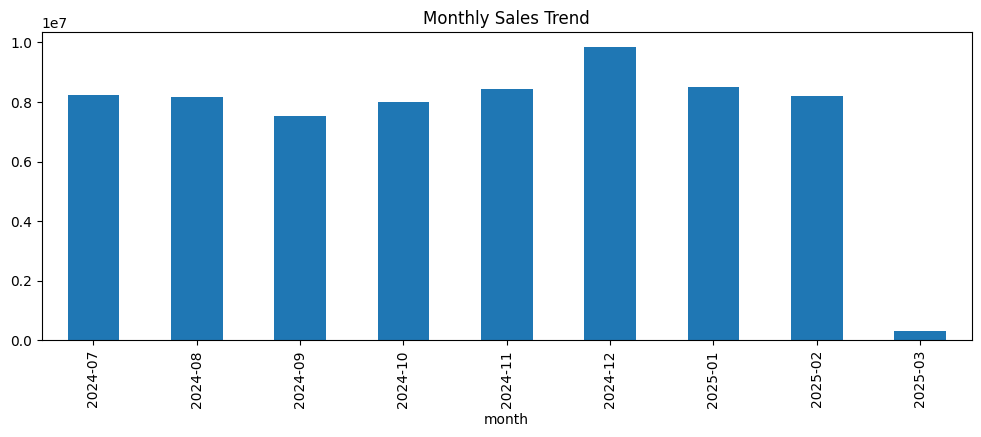

In [25]:
# Monthly total spending trend
past_e_df['transaction_date'] = pd.to_datetime(past_e_df['transaction_date'])
past_e_df['month'] = past_e_df['transaction_date'].dt.to_period('M')
monthly_sales = past_e_df[past_e_df['transaction_amt'] > 0].groupby('month')['transaction_amt'].sum()

# Plot the trend
monthly_sales.plot(kind='bar', figsize=(12,4), title='Monthly Sales Trend')

In [26]:
# Total number of transactions and total amount per customer
activity_df = past_e_df.groupby('current_account_nbr').agg({
    'transaction_amt': ['sum', 'count'],
    'transaction_date': ['min', 'max']
})
activity_df.columns = ['total_amount', 'total_txn_count', 'first_txn_date', 'last_txn_date']
activity_df['days_active'] = (activity_df['last_txn_date'] - activity_df['first_txn_date']).dt.days
activity_df = activity_df.sort_values(by='total_amount', ascending=False)
activity_df

,total_amount,total_txn_count,first_txn_date,last_txn_date,days_active
current_account_nbr,,,,,
C3wKankJl5FlSpis,228250.31,377,2024-07-02,2025-03-01,242
DCik3iqPC8pOBzth,133479.64,68,2024-07-06,2025-02-27,236
FqZVJSlPpa2r5xEE,132561.35,776,2024-07-01,2025-03-01,243
Tyrxaq5byhsu7lJg,120047.03,141,2024-07-02,2025-02-28,241
c6C7W8u45VReBnIw,117343.62,612,2024-07-02,2025-03-01,242
...,...,...,...,...,...
mmAAag8kic4yFvx1,-2751.96,6,2024-09-20,2024-12-23,94
mihVJncoQ3NpbLxC,-3000.00,1,2024-07-19,2024-07-19,0
wOP1HW5HiWQCdm8U,-4423.74,2,2024-07-16,2024-12-02,139


In [27]:
# RFM calculation
today = pd.to_datetime('2025-03-01')
rfm = past_e_df.groupby('current_account_nbr').agg({
    'transaction_date': lambda x: (today - x.max()).days,
    'transaction_amt': ['count', 'sum']
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.sort_values(by='Monetary', ascending=False)
rfm

,Recency,Frequency,Monetary
current_account_nbr,,,
C3wKankJl5FlSpis,0,377,228250.31
DCik3iqPC8pOBzth,2,68,133479.64
FqZVJSlPpa2r5xEE,0,776,132561.35
Tyrxaq5byhsu7lJg,1,141,120047.03
c6C7W8u45VReBnIw,0,612,117343.62
...,...,...,...
mmAAag8kic4yFvx1,68,6,-2751.96
mihVJncoQ3NpbLxC,225,1,-3000.00
wOP1HW5HiWQCdm8U,89,2,-4423.74


In [28]:
rfm['Recency'].describe(percentiles=[.2, .4, .6, .8])
def recency_segment(days):
    if days <= 1:
        return 5
    elif days <= 7:
        return 4
    elif days <= 14:
        return 3
    elif days <= 25:
        return 2
    else:
        return 1

rfm['R_score'] = rfm['Recency'].apply(recency_segment)

In [29]:
rfm['Frequency'].describe(percentiles=[.2, .4, .6, .8])
def frequency_segment(freq):
    if freq <= 2:
        return 1
    elif freq <= 6:
        return 2
    elif freq <= 10:
        return 3
    elif freq <= 18:
        return 4
    else:
        return 5

rfm['F_score'] = rfm['Frequency'].apply(frequency_segment)

In [30]:
rfm['Monetary'].describe(percentiles=[.2, .4, .6, .8])
def monetary_segment(money):
    if money <= 160:
        return 1
    elif money <= 618:
        return 2
    elif money <= 1076:
        return 3
    elif money <= 1847:
        return 4
    else:
        return 5

rfm['M_score'] = rfm['Monetary'].apply(monetary_segment)

In [31]:
rfm['RFM_Score'] = (
    rfm['R_score'].astype(str) +
    rfm['F_score'].astype(str) +
    rfm['M_score'].astype(str)
)

rfm

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
current_account_nbr,,,,,,,
C3wKankJl5FlSpis,0,377,228250.31,5,5,5,555
DCik3iqPC8pOBzth,2,68,133479.64,4,5,5,455
FqZVJSlPpa2r5xEE,0,776,132561.35,5,5,5,555
Tyrxaq5byhsu7lJg,1,141,120047.03,5,5,5,555
c6C7W8u45VReBnIw,0,612,117343.62,5,5,5,555
...,...,...,...,...,...,...,...
mmAAag8kic4yFvx1,68,6,-2751.96,1,2,1,121
mihVJncoQ3NpbLxC,225,1,-3000.00,1,1,1,111
wOP1HW5HiWQCdm8U,89,2,-4423.74,1,1,1,111


#### Merge RFM Segments Back into past_e_df

In [32]:
df_full = past_e_df.merge(rfm, on='current_account_nbr', how='left')
df_full

,current_account_nbr,client_id,open_date,card_activation_date,card_activation_flag,ebill_ind,overlimit_type_flag,payment_hist_1_12_mths,payment_hist_13_24_mths,external_status_reason_code,...,frgn_curr_code,source,month,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,nTgalbpd5Rsol7CA,YCTHAA278DC,2020-07-17 04:00:00,NaT,Non-Activated,E,0,ZZZZZZIAZZZZ,ZZZZIIIQIIII,0,...,"\""\""",local,2024-08,204,1,95.00,1,1,1,111
1,xYaLrD9IvmbVl1PB,CCSP489PLCC,2024-07-24 04:00:00,2024-08-09 04:00:00,Activated,E,0,IQIIIQIA,"\\\\\\""""",0,...,840,local,2024-07,29,4,2201.94,1,2,5,125
2,xYaLrD9IvmbVl1PB,CCSP489PLCC,2024-07-24 04:00:00,2024-08-09 04:00:00,Activated,E,0,IQIIIQIA,"\\\\\\""""",0,...,840,local,2024-07,29,4,2201.94,1,2,5,125
3,xYaLrD9IvmbVl1PB,CCSP489PLCC,2024-07-24 04:00:00,2024-08-09 04:00:00,Activated,E,0,IQIIIQIA,"\\\\\\""""",0,...,840,local,2025-01,29,4,2201.94,1,2,5,125
4,xYaLrD9IvmbVl1PB,CCSP489PLCC,2024-07-24 04:00:00,2024-08-09 04:00:00,Activated,E,0,IQIIIQIA,"\\\\\\""""",0,...,840,local,2024-10,29,4,2201.94,1,2,5,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958273,kSyljlEiwLzNxC53,OSELW263,2023-12-13 05:00:00,NaT,Non-Activated,"\\\\\\""""",0,I21IIQIIIQII,IIIA,35,...,"\""\""",local,2025-01,13,11,936.22,3,4,3,343
958274,kSyljlEiwLzNxC53,OSELW263,2023-12-13 05:00:00,NaT,Non-Activated,"\\\\\\""""",0,I21IIQIIIQII,IIIA,35,...,840,local,2024-09,13,11,936.22,3,4,3,343
958275,kSyljlEiwLzNxC53,OSELW263,2023-12-13 05:00:00,NaT,Non-Activated,"\\\\\\""""",0,I21IIQIIIQII,IIIA,35,...,"\""\""",local,2024-11,13,11,936.22,3,4,3,343
958276,kSyljlEiwLzNxC53,OSELW263,2023-12-13 05:00:00,NaT,Non-Activated,"\\\\\\""""",0,I21IIQIIIQII,IIIA,35,...,840,local,2024-09,13,11,936.22,3,4,3,343


In [33]:
# df_full.to_csv('df_full.csv', index=False)

In [34]:
grouped = df_full.groupby('RFM_Score').agg({
    'transaction_amt': ['mean', 'median', 'sum'],
    'current_account_nbr': 'nunique'  
}).reset_index()
grouped

RFM_Score transaction_amt                       current_account_nbr
                         mean   median          sum             nunique
0         111       23.942776    37.61     32346.69                1049
1         112      235.358351   200.00    154159.72                 471
2         113      643.834247   727.59    166753.07                 201
3         114     1196.381022  1300.00    269185.73                 186
4         115     3964.427140  2728.70   1954462.58                 388
..        ...             ...      ...          ...                 ...
120       551        1.036374    -2.18        94.31                   3
121       552       13.519535     8.48     16845.34                  41
122       553       20.665241    14.18     51063.81                  61
123       554       31.022230    17.70    187405.29                 127
124       555       62.792228    27.95  48193474.83                2501

[125 rows x 5 columns]

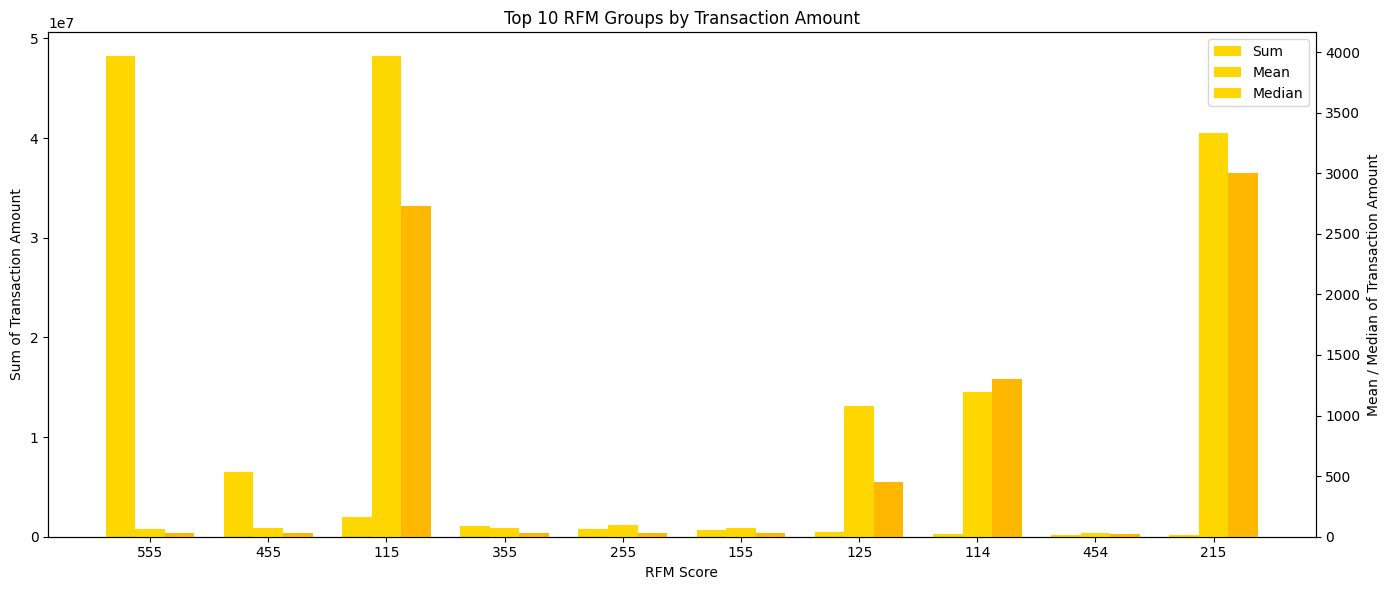

In [35]:
grouped.columns = ['RFM_Score', 'Mean_Transaction', 'Median_Transaction', 'Sum_Transaction', 'Customer_Count']

# Select the top 10 RFM groups with the highest total transaction amount
top_groups = grouped.sort_values('Sum_Transaction', ascending=False).head(10)
x = np.arange(len(top_groups))

# Plot (Dual y-axis with 3 bars in yellow tones)
fig, ax1 = plt.subplots(figsize=(14, 6))
bar_width = 0.25

# Left y-axis: Sum of transaction amount
bars1 = ax1.bar(x - bar_width, top_groups['Sum_Transaction'], width=bar_width, color='gold', label='Sum')
ax1.set_ylabel('Sum of Transaction Amount', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Right y-axis: Mean & Median transaction amount
ax2 = ax1.twinx()
bars2 = ax2.bar(x, top_groups['Mean_Transaction'], width=bar_width, color='#FFD700', label='Mean')  
bars3 = ax2.bar(x + bar_width, top_groups['Median_Transaction'], width=bar_width, color='#FFB700', label='Median')  

ax2.set_ylabel('Mean / Median of Transaction Amount', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# X-axis labels
plt.xticks(ticks=x, labels=top_groups['RFM_Score'], rotation=45, color='black')
ax1.set_xlabel('RFM Score', color='black')
plt.title('Top 10 RFM Groups by Transaction Amount', color='black')

# Combine legends from both axes
bars = bars1 + bars2 + bars3
labels = ['Sum', 'Mean', 'Median']
ax1.legend(bars, labels, loc='upper right')

plt.tight_layout()
plt.show()

In [36]:
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows', None)

In [37]:
# Step 1: Count the number of transactions for each transaction type within each RFM group
tx_dist = df_full.groupby(['RFM_Score', 'transaction_code'])['current_account_nbr'].count().reset_index(name='count')

# Step 2: Calculate the total number of transactions per RFM group
total_per_group = tx_dist.groupby('RFM_Score')['count'].sum().reset_index(name='total')

# Step 3: Merge total counts back to get group-level proportions
tx_dist = tx_dist.merge(total_per_group, on='RFM_Score')

# Step 4: Calculate the percentage of each transaction type within the RFM group
tx_dist['percentage'] = tx_dist['count'] / tx_dist['total']
tx_dist

,RFM_Score,transaction_code,count,total,percentage
0,111,253.0,1216,1351,0.900074
1,111,254.0,1,1351,0.000740
2,111,255.0,110,1351,0.081421
3,111,256.0,21,1351,0.015544
4,111,258.0,1,1351,0.000740
...,...,...,...,...,...
368,555,253.0,747469,767507,0.973892
369,555,254.0,413,767507,0.000538
370,555,255.0,19282,767507,0.025123
371,555,256.0,340,767507,0.000443


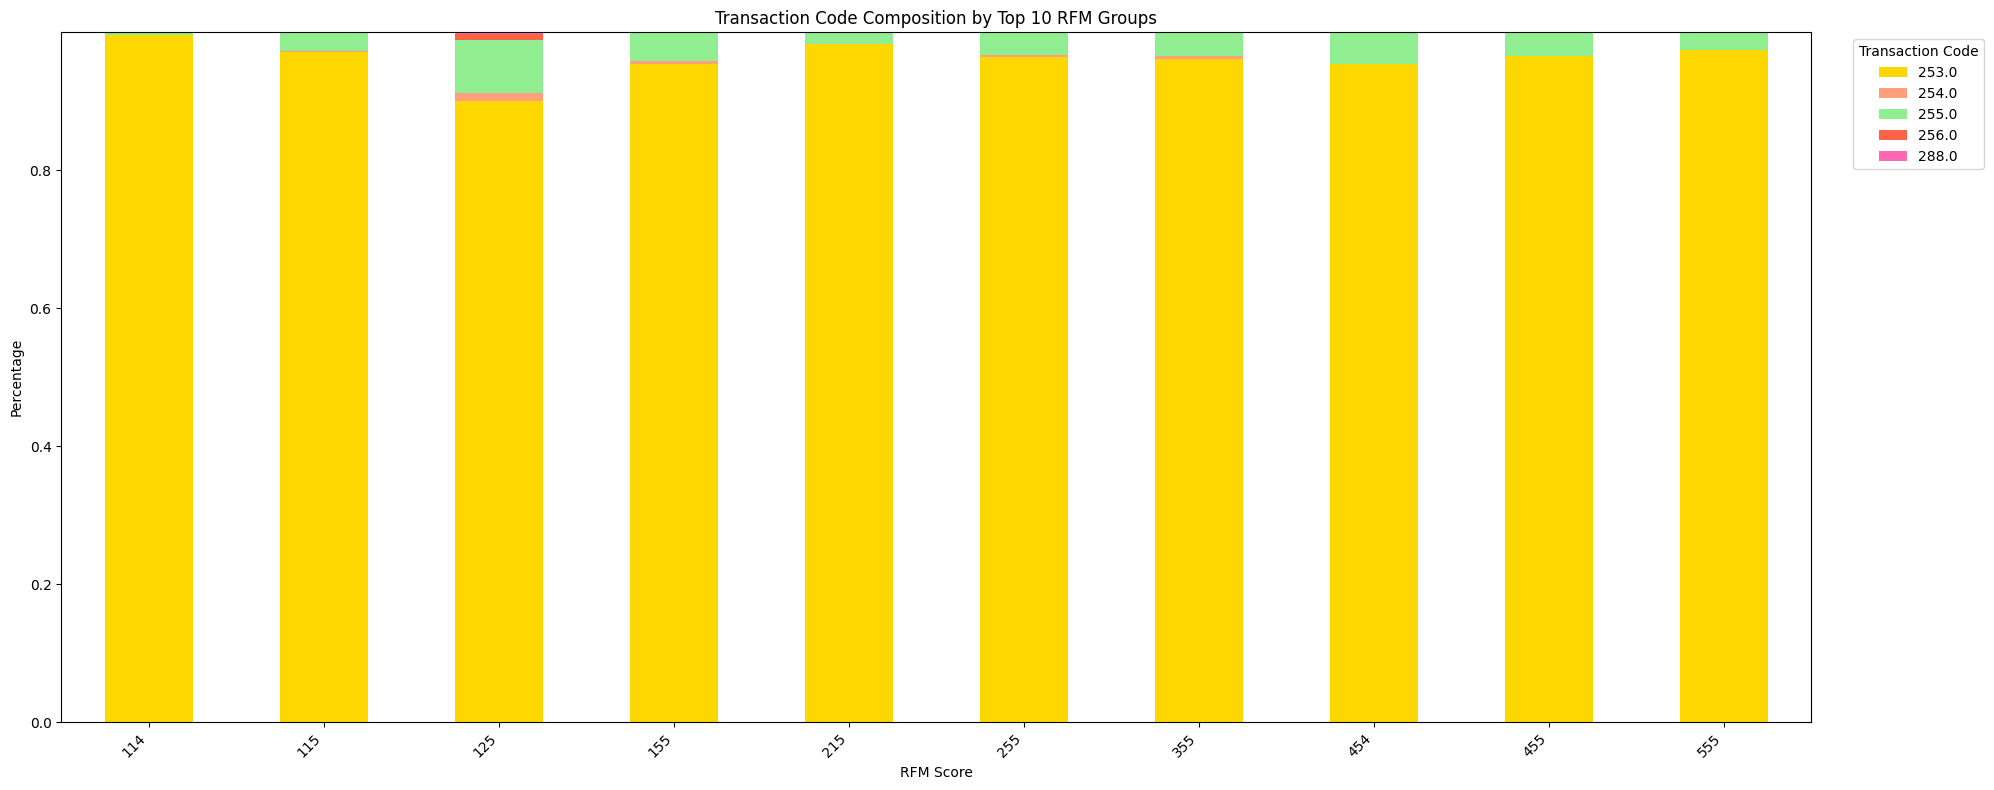

In [38]:
# Step 1: Get the RFM scores of the top 10 groups by total transaction amount
top_scores = top_groups['RFM_Score']

# Step 2: Filter transaction data to include only those top 10 RFM groups
tx_dist_top = df_full[df_full['RFM_Score'].isin(top_scores)] \
    .groupby(['RFM_Score', 'transaction_code'])['current_account_nbr'] \
    .count().reset_index(name='count')

# Step 3: Calculate total transaction count per RFM group
total_per_group = tx_dist_top.groupby('RFM_Score')['count'].sum().reset_index(name='total')

# Step 4: Merge and calculate percentage of each transaction type within the group
tx_dist_top = tx_dist_top.merge(total_per_group, on='RFM_Score')
tx_dist_top['percentage'] = tx_dist_top['count'] / tx_dist_top['total']

# Step 5: Create pivot table with RFM_Score as index and transaction_code as columns
tx_pivot = tx_dist_top.pivot(index='RFM_Score', columns='transaction_code', values='percentage').fillna(0)

# Step 6: Define custom colors for specific transaction codes
custom_colors = {
    253.0: 'gold',
    254.0: '#FFA07A',
    255.0: '#90EE90',
    256.0: '#FF6347',
    257.0: '#9370DB',
    258.0: '#8B4513',
    288.0: '#FF69B4'
}

tx_pivot = tx_pivot[[col for col in custom_colors if col in tx_pivot.columns]]

fig, ax = plt.subplots(figsize=(20, 8))
tx_pivot.plot(kind='bar', stacked=True, ax=ax, color=[custom_colors[col] for col in tx_pivot.columns])
plt.title('Transaction Code Composition by Top 10 RFM Groups')
plt.ylabel('Percentage')
plt.xlabel('RFM Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Code', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\cindy\AppData\Local\Temp\ipykernel_12492\2269253655.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_trend_top['month'] = monthly_trend_top['month'].astype(str)


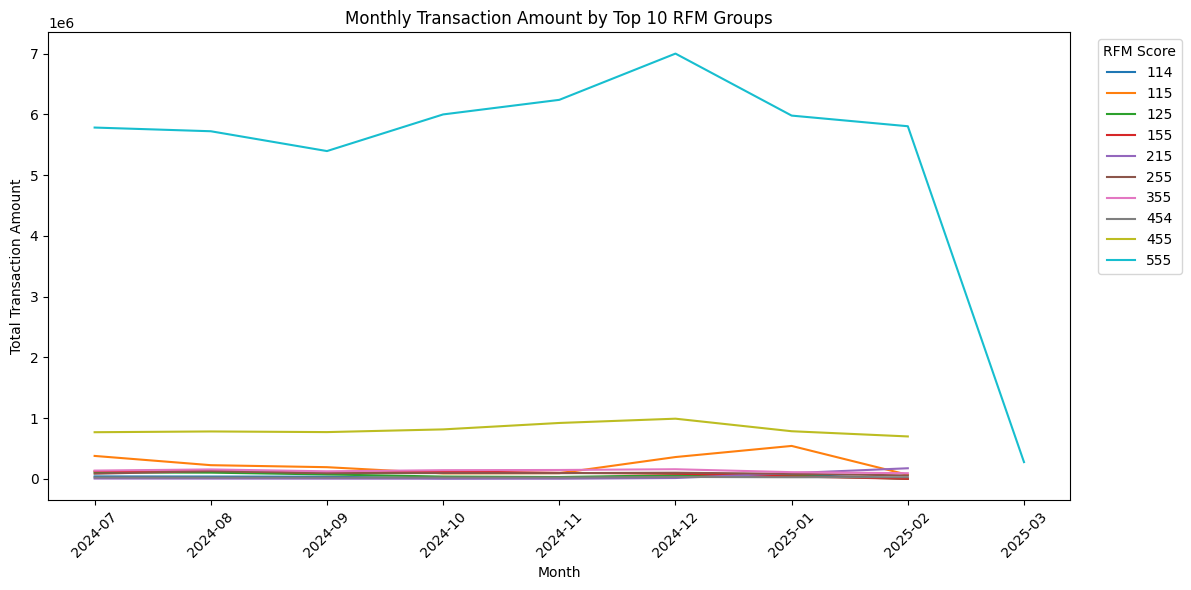

In [39]:
# Step 1: Calculate total transaction amount per month for each RFM group
monthly_trend = (
    df_full.groupby(['RFM_Score', 'month'])['transaction_amt']
    .sum()
    .reset_index()
)

# Step 2: Filter to include only the top 10 RFM groups
monthly_trend_top = monthly_trend[monthly_trend['RFM_Score'].isin(top_scores)]

# Step 3: Ensure 'month' is a string to avoid plotting issues
monthly_trend_top['month'] = monthly_trend_top['month'].astype(str)

# Step 4: Plot monthly trends for top 10 RFM groups
plt.figure(figsize=(12, 6))
for key, grp in monthly_trend_top.groupby('RFM_Score'):
    plt.plot(grp['month'], grp['transaction_amt'], label=key)

plt.title('Monthly Transaction Amount by Top 10 RFM Groups')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.legend(title='RFM Score', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Q4 2025 Spending Forecast by RFM Group

#### Model Setup (Based on Q3 → Q4 RFM Transition)
We use RFM data from 2024 Q3 as the input features (X) and RFM scores from 2024 Q4 as the prediction target (y).

##### `X_train`: The model input features, which include the individual R_score, F_score, and M_score from Q3.

In [40]:
# Ensure 'transaction_date' is in datetime format
all_df['transaction_date'] = pd.to_datetime(all_df['transaction_date'], errors='coerce')
obs_start, obs_end = '2024-07-01', '2024-09-30'
obs_end_ts = pd.to_datetime(obs_end)

# Extract transaction records within the observation period
obs_df = all_df[
    (all_df['transaction_date'] >= obs_start) &
    (all_df['transaction_date'] <= obs_end)
]

# Calculate Recency (days since last transaction), Frequency (transaction count), and Monetary (total amount)
rfm_train = obs_df.groupby('current_account_nbr').agg({
    'transaction_date': lambda x: (obs_end_ts - x.max()).days,
    'transaction_amt': ['count', 'sum']
}).reset_index()

rfm_train.columns = ['current_account_nbr', 'Recency', 'Frequency', 'Monetary']

In [41]:
rfm_train['Recency'].describe(percentiles=[.2, .4, .6, .8])
def recency_segment(days):
    if days <= 0:
        return 5
    elif days <= 3:
        return 4
    elif days <= 7:
        return 3
    elif days <= 13:
        return 2
    else:
        return 1

rfm_train['R_score'] = rfm_train['Recency'].apply(recency_segment)

In [42]:
rfm_train['Frequency'].describe(percentiles=[.2, .4, .6, .8])
def frequency_segment(freq):
    if freq <= 2:
        return 1
    elif freq <= 4:
        return 2
    elif freq <= 7:
        return 3
    elif freq <= 14:
        return 4
    else:
        return 5

rfm_train['F_score'] = rfm_train['Frequency'].apply(frequency_segment)

In [43]:
rfm_train['Monetary'].describe(percentiles=[.2, .4, .6, .8])
def monetary_segment(money):
    if money <= 92:
        return 1
    elif money <= 357:
        return 2
    elif money <= 663:
        return 3
    elif money <= 1229:
        return 4
    else:
        return 5

rfm_train['M_score'] = rfm_train['Monetary'].apply(monetary_segment)

In [44]:
rfm_train['RFM_Score'] = (
    rfm_train['R_score'].astype(str) +
    rfm_train['F_score'].astype(str) +
    rfm_train['M_score'].astype(str)
)

rfm_train

,current_account_nbr,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,00iP5U82D8XwVQ9G,0,150,1058.34,5,5,4,554
1,00oyr3QppAzjLws4,65,2,150.04,1,1,2,112
2,033o9yHYen3xoz6k,0,110,5340.59,5,5,5,555
3,034bM166vNmgLiIA,9,28,1537.85,2,5,5,255
4,049sX01uVFhaa0i2,0,162,7859.83,5,5,5,555
...,...,...,...,...,...,...,...,...
8134,zxn3AYXktnnqqYRJ,0,11,638.01,5,4,3,543
8135,zxwuHFEBf4ERmY9F,3,12,496.48,4,4,3,443
8136,zyZhjzJwhpOgSvmc,0,47,1556.21,5,5,5,555
8137,zzBy2qNM78aRV580,73,3,2516.62,1,2,5,125


##### `y_train`: The target label to be predicted — the composite RFM score in Q4 (e.g., 555, 344, etc.).

In [45]:
label_start, label_end = '2024-10-01', '2024-12-31'
label_end_ts = pd.to_datetime(label_end)

label_df = all_df[
    (all_df['transaction_date'] >= label_start) &
    (all_df['transaction_date'] <= label_end)
]

rfm_label = label_df.groupby('current_account_nbr').agg({
    'transaction_date': lambda x: (label_end_ts - x.max()).days,
    'transaction_amt': ['count', 'sum']
}).reset_index()

rfm_label.columns = ['current_account_nbr', 'Recency', 'Frequency', 'Monetary']

In [46]:
rfm_label['Recency'].describe(percentiles=[.2, .4, .6, .8])
def recency_segment(days):
    if days <= 0:
        return 5
    elif days <= 3:
        return 4
    elif days <= 7:
        return 3
    elif days <= 11:
        return 2
    else:
        return 1

rfm_label['R_score'] = rfm_label['Recency'].apply(recency_segment)

In [47]:
rfm_label['Frequency'].describe(percentiles=[.2, .4, .6, .8])
def frequency_segment(freq):
    if freq <= 2:
        return 1
    elif freq <= 4:
        return 2
    elif freq <= 8:
        return 3
    elif freq <= 15:
        return 4
    else:
        return 5

rfm_label['F_score'] = rfm_label['Frequency'].apply(frequency_segment)

In [48]:
rfm_label['Monetary'].describe(percentiles=[.2, .4, .6, .8])
def monetary_segment(money):
    if money <= 89:
        return 1
    elif money <= 333:
        return 2
    elif money <= 621:
        return 3
    elif money <= 1187:
        return 4
    else:
        return 5

rfm_label['M_score'] = rfm_label['Monetary'].apply(monetary_segment)

In [49]:
rfm_label['RFM_Score'] = (
    rfm_label['R_score'].astype(str) +
    rfm_label['F_score'].astype(str) +
    rfm_label['M_score'].astype(str)
)

rfm_label

,current_account_nbr,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,00iP5U82D8XwVQ9G,0,258,1826.41,5,5,5,555
1,00oyr3QppAzjLws4,20,4,162.62,1,2,2,122
2,033o9yHYen3xoz6k,1,154,7532.98,4,5,5,455
3,034bM166vNmgLiIA,14,19,719.39,1,5,4,154
4,049sX01uVFhaa0i2,0,132,6103.60,5,5,5,555
...,...,...,...,...,...,...,...,...
8731,zxn3AYXktnnqqYRJ,0,5,211.88,5,3,2,532
8732,zxwuHFEBf4ERmY9F,2,28,1149.19,4,5,4,454
8733,zyZhjzJwhpOgSvmc,0,68,1967.11,5,5,5,555
8734,zz3nbtZXS41NZk0h,4,4,154.91,3,2,2,322


##### `X_test`: The R, F, and M scores calculated from 2025-01-01 to 2025-03-01, used as the basis to predict spending behavior in 2025 Q4.

In [50]:
test_start, test_end = '2025-01-01', '2025-03-01'
test_end_ts = pd.to_datetime(test_end)

test_df = all_df[
    (all_df['transaction_date'] >= test_start) &
    (all_df['transaction_date'] <= test_end)
]

rfm_test = test_df.groupby('current_account_nbr').agg({
    'transaction_date': lambda x: (test_end_ts - x.max()).days,
    'transaction_amt': ['count', 'sum']
}).reset_index()

rfm_test.columns = ['current_account_nbr', 'Recency', 'Frequency', 'Monetary']

In [51]:
rfm_test['Recency'].describe(percentiles=[.2, .4, .6, .8])
def recency_segment(days):
    if days <= 0:
        return 5
    elif days <= 2:
        return 4
    elif days <= 5:
        return 3
    elif days <= 9:
        return 2
    else:
        return 1

rfm_test['R_score'] = rfm_test['Recency'].apply(recency_segment)

In [52]:
rfm_test['Frequency'].describe(percentiles=[.2, .4, .6, .8])
def frequency_segment(freq):
    if freq <= 2:
        return 1
    elif freq <= 3:
        return 2
    elif freq <= 6:
        return 3
    elif freq <= 11:
        return 4
    else:
        return 5

rfm_test['F_score'] = rfm_test['Frequency'].apply(frequency_segment)

In [53]:
rfm_test['Monetary'].describe(percentiles=[.2, .4, .6, .8])
def monetary_segment(money):
    if money <= 50:
        return 1
    elif money <= 252:
        return 2
    elif money <= 490:
        return 3
    elif money <= 976:
        return 4
    else:
        return 5

rfm_test['M_score'] = rfm_test['Monetary'].apply(monetary_segment)

In [54]:
rfm_test['RFM_Score'] = (
    rfm_test['R_score'].astype(str) +
    rfm_test['F_score'].astype(str) +
    rfm_test['M_score'].astype(str)
)

rfm_test

,current_account_nbr,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,00iP5U82D8XwVQ9G,2,108,819.05,4,5,4,454
1,00oyr3QppAzjLws4,40,1,30.03,1,1,1,111
2,02WRVV8yusgcZWLW,0,32,4300.53,5,5,5,555
3,033o9yHYen3xoz6k,0,97,4284.77,5,5,5,555
4,034bM166vNmgLiIA,11,6,156.24,1,3,2,132
...,...,...,...,...,...,...,...,...
8396,zxwuHFEBf4ERmY9F,5,8,205.68,3,4,2,342
8397,zyZhjzJwhpOgSvmc,2,62,1550.97,4,5,5,455
8398,zz3nbtZXS41NZk0h,28,2,33.95,1,1,1,111
8399,zzEuUBBmvGiVnabb,1,37,4430.15,4,5,5,455


##### RFM Segment Prediction: Q3 → Q4 Model with 2025 Forecasting

In [55]:
# 1️⃣ Merge training features with RFM labels
train_df = pd.merge(
    rfm_train,
    rfm_label[['current_account_nbr', 'RFM_Score']],
    on='current_account_nbr',
    suffixes=('_Q3', '_Q4')
)

# 2️⃣ Prepare features and labels
X_train = train_df[['R_score', 'F_score', 'M_score']]       # Features from 2024 Q3
y_train = train_df['RFM_Score_Q4']                          # True RFM segment from 2024 Q4

# 3️⃣ Build and train the model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4️⃣ Prepare Q1 2025 accounts for prediction
X_test = rfm_test[['R_score', 'F_score', 'M_score']]        # Features to predict
account_ids = rfm_test['current_account_nbr']               # For mapping predictions

# 5️⃣ Make predictions
predicted_rfm = model.predict(X_test)

# 6️⃣ Format prediction results
prediction_df = pd.DataFrame({
    'current_account_nbr': account_ids,
    'predicted_2025Q4_RFM': predicted_rfm
})
print(prediction_df.head())

  current_account_nbr predicted_2025Q4_RFM
0    00iP5U82D8XwVQ9G                  455
1    00oyr3QppAzjLws4                  111
2    02WRVV8yusgcZWLW                  555
3    033o9yHYen3xoz6k                  555
4    034bM166vNmgLiIA                  132


In [56]:
# Split original training data into training and validation sets (to evaluate model performance)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

# Retrain the model on the training split
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)

# Predict on the validation set
y_pred_val = model.predict(X_val_split)

# Evaluate model performance
print(classification_report(y_val_split, y_pred_val))
print("Accuracy:", accuracy_score(y_val_split, y_pred_val))

              precision    recall  f1-score   support

         111       0.24      0.44      0.31       107
         112       0.15      0.24      0.19        58
         113       0.00      0.00      0.00         9
         114       0.00      0.00      0.00        10
         115       0.14      0.17      0.15         6
         121       0.29      0.34      0.31        73
         122       0.06      0.09      0.07        32
         123       0.00      0.00      0.00        11
         124       0.06      0.11      0.08         9
         125       0.00      0.00      0.00         4
         131       0.00      0.00      0.00        11
         132       0.06      0.13      0.08        47
         133       0.00      0.00      0.00        12
         134       0.00      0.00      0.00         8
         135       0.00      0.00      0.00        11
         141       0.00      0.00      0.00         5
         142       0.12      0.21      0.16        14
         143       0.00    

c:\Users\cindy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cindy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cindy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [57]:
report_dict = classification_report(y_val_split, y_pred_val, output_dict=True)
report_df = pd.DataFrame(report_dict).T

filtered_report = report_df[
    (report_df['support'] > 50) & 
    ((report_df['precision'] > 0.2) | (report_df['recall'] > 0.2))
]
filtered_report

c:\Users\cindy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cindy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cindy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

,precision,recall,f1-score,support
111,0.236181,0.439252,0.307190,107.0
112,0.152174,0.241379,0.186667,58.0
121,0.290698,0.342466,0.314465,73.0
555,0.554913,0.926045,0.693976,311.0
weighted avg,0.200671,0.309225,0.237776,1355.0


In [58]:
# Identify accounts that exist in both the label and test datasets
common_accounts = set(rfm_label['current_account_nbr']).intersection(set(rfm_test['current_account_nbr']))

# Filter test set to include only accounts that exist in both datasets (for comparison)
comparison_df = rfm_test[rfm_test['current_account_nbr'].isin(common_accounts)].copy()

# Add the original (labeled) RFM segment from the previous period
comparison_df['original_rfm'] = rfm_label.set_index('current_account_nbr').loc[comparison_df['current_account_nbr']]['RFM_Score'].values

# Predict RFM segments for 2025 Q4 using the trained model
X_test_features = comparison_df[['R_score', 'F_score', 'M_score']]
comparison_df['predicted_rfm'] = model.predict(X_test_features)

# Create a transition matrix to visualize RFM group changes (original vs predicted)
transition_matrix = pd.crosstab(comparison_df['original_rfm'], comparison_df['predicted_rfm'], normalize='index')
transition_matrix.style.format("{:.2%}")

predicted_rfm,111,112,113,114,115,121,122,123,124,132,133,134,142,144,154,155,221,222,223,244,245,311,321,322,323,334,335,345,423,432,453,454,455,521,542,552,553,554,555
original_rfm,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
111,56.15%,16.72%,0.63%,0.32%,0.63%,2.52%,5.68%,0.00%,0.63%,7.26%,0.00%,0.00%,0.95%,0.00%,0.63%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.32%,2.21%,0.32%,0.00%,0.63%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,1.89%,0.00%,0.32%,0.00%,0.32%,0.32%,1.58%
112,29.10%,35.45%,3.70%,0.00%,1.06%,3.17%,7.41%,1.59%,3.70%,3.17%,0.53%,0.00%,0.53%,0.53%,0.00%,0.00%,0.53%,0.00%,1.06%,0.53%,1.06%,0.00%,2.12%,0.53%,0.00%,0.53%,0.53%,0.00%,0.00%,0.00%,0.00%,0.00%,2.12%,0.00%,0.00%,0.00%,0.00%,0.00%,1.06%
113,37.50%,17.50%,10.00%,2.50%,2.50%,2.50%,2.50%,0.00%,10.00%,2.50%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,2.50%,0.00%,0.00%,0.00%,0.00%,0.00%,7.50%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,2.50%
114,59.46%,18.92%,5.41%,5.41%,0.00%,2.70%,2.70%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,2.70%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,2.70%
115,80.39%,1.96%,3.92%,0.00%,1.96%,1.96%,0.00%,0.00%,1.96%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,1.96%,1.96%,0.00%,0.00%,0.00%,0.00%,3.92%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
121,77.30%,5.21%,0.00%,0.00%,0.00%,4.91%,2.15%,0.00%,0.61%,5.21%,0.00%,0.61%,0.00%,0.31%,0.00%,0.00%,0.31%,0.00%,0.00%,0.00%,0.00%,0.00%,1.53%,0.00%,0.00%,0.00%,0.31%,0.00%,0.00%,0.00%,0.61%,0.00%,0.61%,0.00%,0.00%,0.00%,0.00%,0.00%,0.31%
122,43.71%,20.53%,1.32%,0.00%,0.66%,3.97%,7.95%,0.00%,1.99%,8.61%,0.00%,0.00%,0.66%,0.66%,0.66%,1.32%,0.66%,0.00%,0.00%,0.00%,0.00%,0.00%,1.99%,0.00%,0.66%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,2.65%,0.00%,0.00%,0.00%,0.00%,0.00%,1.99%
123,35.09%,29.82%,7.02%,1.75%,1.75%,0.00%,7.02%,1.75%,3.51%,3.51%,1.75%,1.75%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,3.51%,0.00%,1.75%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
124,35.42%,20.83%,14.58%,0.00%,0.00%,2.08%,6.25%,0.00%,4.17%,0.00%,2.08%,0.00%,0.00%,0.00%,0.00%,0.00%,2.08%,0.00%,2.08%,0.00%,0.00%,0.00%,2.08%,0.00%,0.00%,4.17%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,4.17%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


In [59]:
# Identify the most likely predicted RFM group for each original RFM group
top_predictions = transition_matrix.idxmax(axis=1).reset_index()
top_predictions.columns = ['original_rfm', 'most_likely_predicted_rfm']

top_predictions

,original_rfm,most_likely_predicted_rfm
0,111,111
1,112,112
2,113,111
3,114,111
4,115,111
...,...,...
115,545,555
116,552,453
117,553,455
118,554,455


In [ ]:
# 1. Calculate the average spending in 2024 Q4 for each RFM group
rfm_avg_spending = rfm_label.groupby('RFM_Score')['Monetary'].mean().reset_index()
rfm_avg_spending.columns = ['RFM_Score', 'avg_2024Q4_spending']

# 2. Map predicted 2025 Q4 RFM groups to their corresponding average spending
top_predictions = top_predictions.copy()
top_predictions = top_predictions.rename(columns={'most_likely_predicted_rfm': 'RFM_Score'})  # Rename for merging

top_predictions = pd.merge(top_predictions, rfm_avg_spending, on='RFM_Score', how='left')

# 3. Rename column to indicate it is the estimated 2025 Q4 spending
top_predictions = top_predictions.rename(columns={'avg_2024Q4_spending': 'estimated_2025Q4_spending'})
top_predictions

,original_rfm,RFM_Score,estimated_2025Q4_spending
0,111,111,6.959189
1,112,112,174.027657
2,113,111,6.959189
3,114,111,6.959189
4,115,111,6.959189
...,...,...,...
115,545,555,8992.378723
116,552,453,484.304038
117,553,455,6406.137330
118,554,455,6406.137330


##### Compressing RFM Scores into High / Medium / Low Value Groups

In [61]:
# Define a function to compress a 3-digit RFM score into a broader category
def compress_rfm(rfm):
    r, f, m = int(str(rfm)[0]), int(str(rfm)[1]), int(str(rfm)[2])
    if r >= 4 and f >= 4 and m >= 4:
        return 'High'
    elif r <= 2 and f <= 2 and m <= 2:
        return 'Low'
    else:
        return 'Medium'

# Apply RFM compression to classify customers into High / Medium / Low value groups
rfm_train['rfm_group'] = rfm_train['RFM_Score'].apply(compress_rfm)
rfm_label['rfm_group'] = rfm_label['RFM_Score'].apply(compress_rfm)

In [62]:
train_df = pd.merge(
    rfm_train[['current_account_nbr', 'R_score', 'F_score', 'M_score']],
    rfm_label[['current_account_nbr', 'rfm_group']],
    on='current_account_nbr',
    how='inner'
)

In [63]:
# Define features and labels
X = train_df[['R_score', 'F_score', 'M_score']]
y = train_df['rfm_group']

# Split the dataset (70% training / 30% testing), with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Accuracy: 0.6979832759468766

Classification Report:
              precision    recall  f1-score   support

        High       0.83      0.86      0.84       809
         Low       0.57      0.57      0.57       427
      Medium       0.63      0.60      0.62       797

    accuracy                           0.70      2033
   macro avg       0.67      0.68      0.68      2033
weighted avg       0.70      0.70      0.70      2033



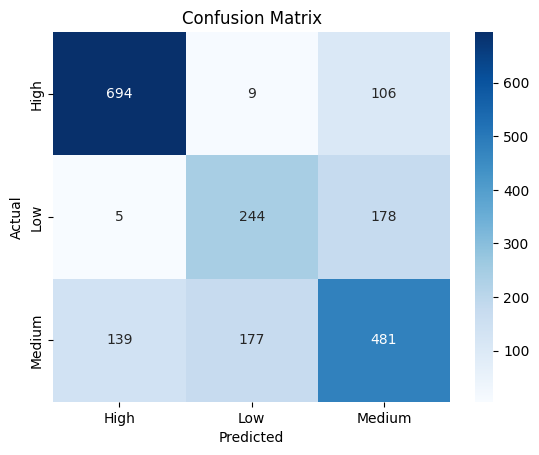

In [64]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()